In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.set_index('PassengerId', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    float64
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    float64
 3   Parch     891 non-null    float64
 4   Fare      891 non-null    float64
 5   Survived  891 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 48.7 KB


In [5]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,
1,1.0,0.375000,0.4,0.0,0.110460,0
2,0.0,0.682692,0.4,0.0,1.000000,1
3,1.0,0.451923,0.0,0.0,0.120745,1
4,0.0,0.625000,0.4,0.0,0.809027,1
5,1.0,0.625000,0.0,0.0,0.122649,0


In [6]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.510371,0.170595,0.063599,0.366375,0.383838
std,0.418036,0.232155,0.283298,0.134343,0.312056,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.000000,0.000000,0.120522,0.000000
50%,1.000000,0.490385,0.000000,0.000000,0.220223,0.000000
75%,1.000000,0.625000,0.400000,0.000000,0.472313,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].median(), inplace=True)

In [8]:
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [10]:
def handle_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [11]:
for column in ['Age', 'Fare', 'SibSp']:
    handle_outliers(column)

In [12]:
features = df.drop(columns=['Survived'])

In [13]:
features = df.drop(columns=['Survived'])
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=features.columns)

In [14]:
processed_df = pd.concat([scaled_df, df['Survived']], axis=1)

In [15]:
processed_df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,
1,1.0,0.375000,0.4,0.0,0.110460,0
2,0.0,0.682692,0.4,0.0,1.000000,1
3,1.0,0.451923,0.0,0.0,0.120745,1
4,0.0,0.625000,0.4,0.0,0.809027,1
5,1.0,0.625000,0.0,0.0,0.122649,0


In [16]:
processed_df.to_csv('titanic.csv', index=True)

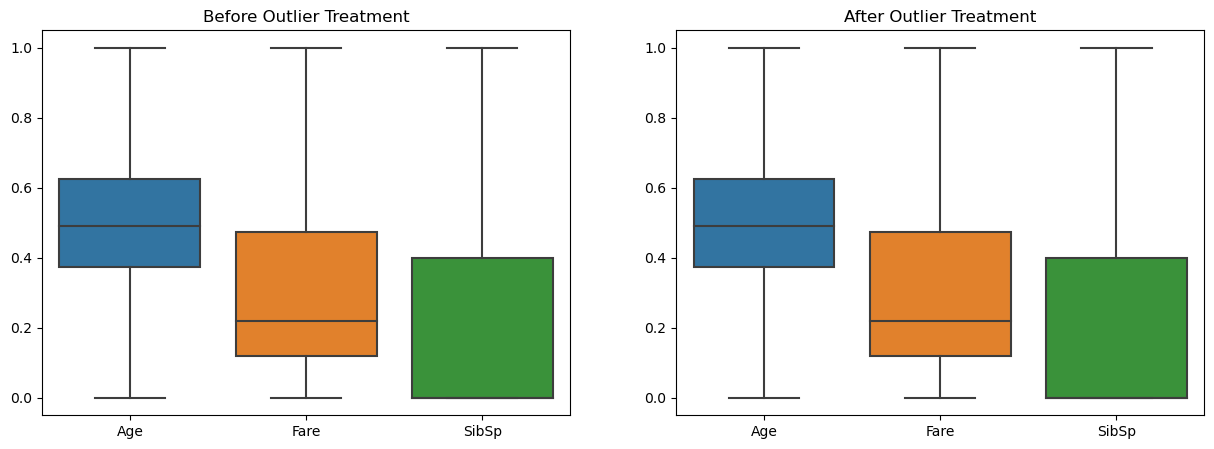

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp']], ax=ax[0])
ax[0].set_title('Before Outlier Treatment')
sns.boxplot(data=processed_df[['Age', 'Fare', 'SibSp']], ax=ax[1])
ax[1].set_title('After Outlier Treatment')
plt.show()